<h1><center>HW 3: Build Twitter Networks</center></h1>

## Name: Yogesh Awdhut Gadade

### CWID: 10467214


### NOTE: I have used Google Colab to run this notebook in which I am able to get correct output using api.show_friendship()

#### **Content of this notebook:**

1. <a href="#Q1">Solution for Question 1 </a>
2. <a href="#Q2">Solution for Question 2 </a>
3. <a href="#Q3">Solution for Bonus Question </a>


<a id='Q1'></a>
### Q1. Scrape the follower-followee network by companies. (5 points)
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


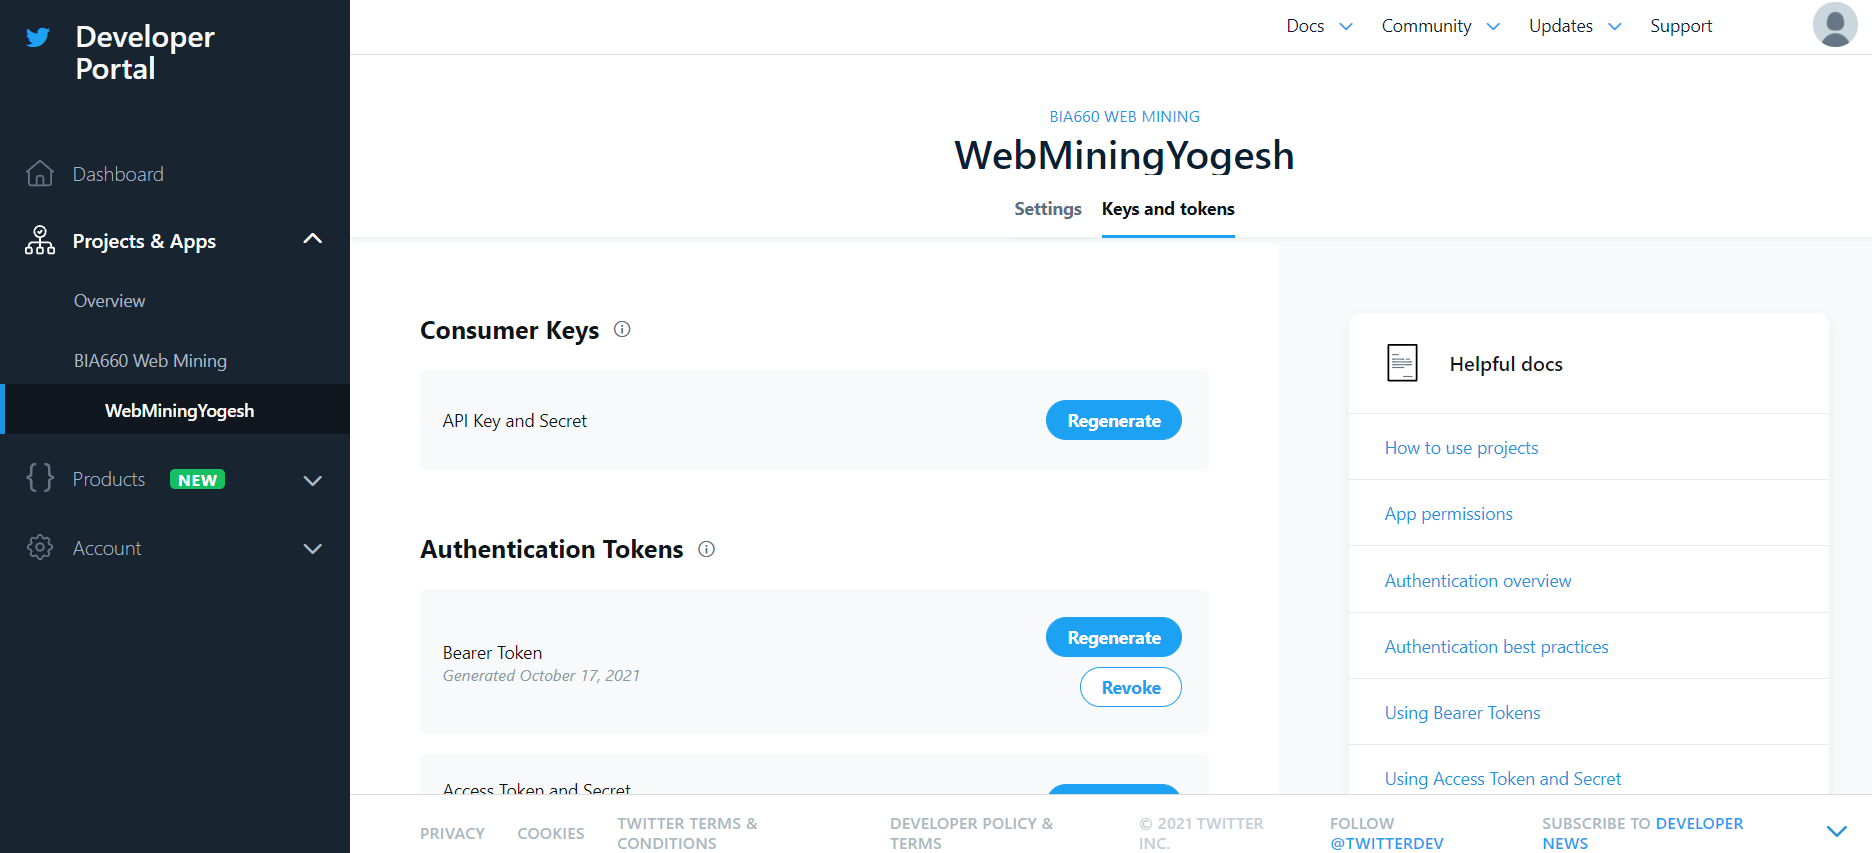

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
import datetime
import time

In [2]:
#Setting up Tweepy authorization:
CONSUMER_KEY= 'z8ROS38b3lsuapx1vTJ6WsyLT'
CONSUMER_SECRET='lvEObrG40h5zWVh6XPYWit7LtZqDZgJ2GuVW90CW2Ze93P4ewC'
ACCESS_KEY='2695200757-4yt9TH6X2ShChYnwGVxZFjzFZOJNox1mXg186m2'
ACCESS_SECRET='YTtVpdD4BQ2fNiCnsd8JoBl2vzav9nR8KBcOr9xMtKgsb'

#Setting up Tweepy authorization:
#Before getting started you Tweepy will have to authorize that you have the credentials to utilize its API. 
#The following code snippet is how one authorizes themself.
# Authentication using API keys  
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

### 5.3. Build Twitter networks
- **Follower-followee network**
    - If you have a list of user accounts, you may retrive the pairwise boolean values of following relations. 
    - Parameters
        * `source_id` – The user_id of the subject user.
        * `source_screen_name` – The screen_name of the subject user.
        * `target_id` – The user_id of the target user.
        * `target_screen_name` – The screen_name of the target user.
- **Retweet network**
    - Retweeted accounts can be extracted while scraping the API. 
    - Or retweeted accounts can be extracted from the text. 
- **Mention network**
    - Can be extracted from the full text. 

In [3]:
def get_follow(accounts):

  #Creating empty adjancency matrix
  tb=pd.DataFrame(columns=accounts, index=accounts)
  
  # How to scrape the follower-followee network?
  # we can directly retrieve a bollean value 
  for dog in accounts:
    for cat in accounts:

      ### NOTE: I have used Google Colab to run this notebook in which I am able to get correct output using api.show_friendship()
      is_following = api.show_friendship(source_screen_name=dog,target_screen_name=cat)
      blFollowing=is_following[1].following
      print("dog:{}, cat:{} => is following: {}".format(dog, cat, blFollowing))

      # Filling in the values in the adjancency matrix
      tb.loc[dog][cat]=blFollowing
      
      #print(tb)

  return tb

In [9]:
# test the function with the list of accounts
accounts=['walmart',
 'tysonfoods',
 'godaddy',
 'republicservice',
 'firstsolar',
 'taylor_morrison',
 'onsemi',
 'fm_fcx',
 'amkortechnology',
 'magellanhealth',
 'edwardslifesci',
 'visa',
 'cbre',
 'smartfinal',
 'google',
 'waltdisneyco',
 'atvi_ab',
 'ebay',
 'intuit',
 'edisonintl']

tb=get_follow(accounts)
tb

dog:walmart, cat:walmart => is following: False
dog:walmart, cat:tysonfoods => is following: True
dog:walmart, cat:godaddy => is following: False
dog:walmart, cat:republicservice => is following: False
dog:walmart, cat:firstsolar => is following: False
dog:walmart, cat:taylor_morrison => is following: False
dog:walmart, cat:onsemi => is following: False
dog:walmart, cat:fm_fcx => is following: False
dog:walmart, cat:amkortechnology => is following: False
dog:walmart, cat:magellanhealth => is following: False
dog:walmart, cat:edwardslifesci => is following: False
dog:walmart, cat:visa => is following: False
dog:walmart, cat:cbre => is following: False
dog:walmart, cat:smartfinal => is following: False
dog:walmart, cat:google => is following: False
dog:walmart, cat:waltdisneyco => is following: False
dog:walmart, cat:atvi_ab => is following: False
dog:walmart, cat:ebay => is following: False
dog:walmart, cat:intuit => is following: False
dog:walmart, cat:edisonintl => is following: False

,walmart,tysonfoods,godaddy,republicservice,firstsolar,taylor_morrison,onsemi,fm_fcx,amkortechnology,magellanhealth,edwardslifesci,visa,cbre,smartfinal,google,waltdisneyco,atvi_ab,ebay,intuit,edisonintl
walmart,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tysonfoods,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
godaddy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
republicservice,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
firstsolar,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
taylor_morrison,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
onsemi,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
fm_fcx,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
amkortechnology,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
magellanhealth,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
tb.astype(int)

,walmart,tysonfoods,godaddy,republicservice,firstsolar,taylor_morrison,onsemi,fm_fcx,amkortechnology,magellanhealth,edwardslifesci,visa,cbre,smartfinal,google,waltdisneyco,atvi_ab,ebay,intuit,edisonintl
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
godaddy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
republicservice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
firstsolar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
taylor_morrison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
onsemi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
fm_fcx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
amkortechnology,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
magellanhealth,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id='Q2'> </a>
### Q2. Build a directed network with the data you just scraped. (5 points)
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the indegree centrality and structural hole (you can use constraint). 
    * Sort these nodes by indegree centrality and print the top one account.
    * Sort these nodes by structural hole and print the top one account. 
    * Note the NA values in constraint measures. Also note the relation between structural hole and constraint.

,walmart,tysonfoods,godaddy,republicservice,firstsolar,taylor_morrison,onsemi,fm_fcx,amkortechnology,magellanhealth,edwardslifesci,visa,cbre,smartfinal,google,waltdisneyco,atvi_ab,ebay,intuit,edisonintl
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
godaddy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
republicservice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
firstsolar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
taylor_morrison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
onsemi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
fm_fcx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
amkortechnology,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
magellanhealth,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Edges in the graph [('walmart', 'tysonfoods', {'weight': 1}), ('tysonfoods', 'walmart', {'weight': 1}), ('tysonfoods', 'smartfinal', {'weight': 1}), ('onsemi', 'amkortechnology', {'weight': 1}), ('amkortechnology', 'onsemi', {'weight': 1}), ('smartfinal', 'tysonfoods', {'weight': 1}), ('google', 'tysonfoods', {'weight': 1}), ('google', 'republicservice', {'weight': 1}), ('google', 'taylor_morrison', {'weight': 1}), ('google', 'cbre', {'weight': 1}), ('google', 'ebay', {'weight': 1}), ('google', 'intuit', {'weight': 1})]


,source,target,weight
0,walmart,tysonfoods,1
1,tysonfoods,walmart,1
2,tysonfoods,smartfinal,1
3,onsemi,amkortechnology,1
4,amkortechnology,onsemi,1
5,smartfinal,tysonfoods,1
6,google,tysonfoods,1
7,google,republicservice,1
8,google,taylor_morrison,1
9,google,cbre,1




# of edges: 12
# of nodes: 20
['walmart', 'tysonfoods', 'godaddy', 'republicservice', 'firstsolar'] Graph size:  12


<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

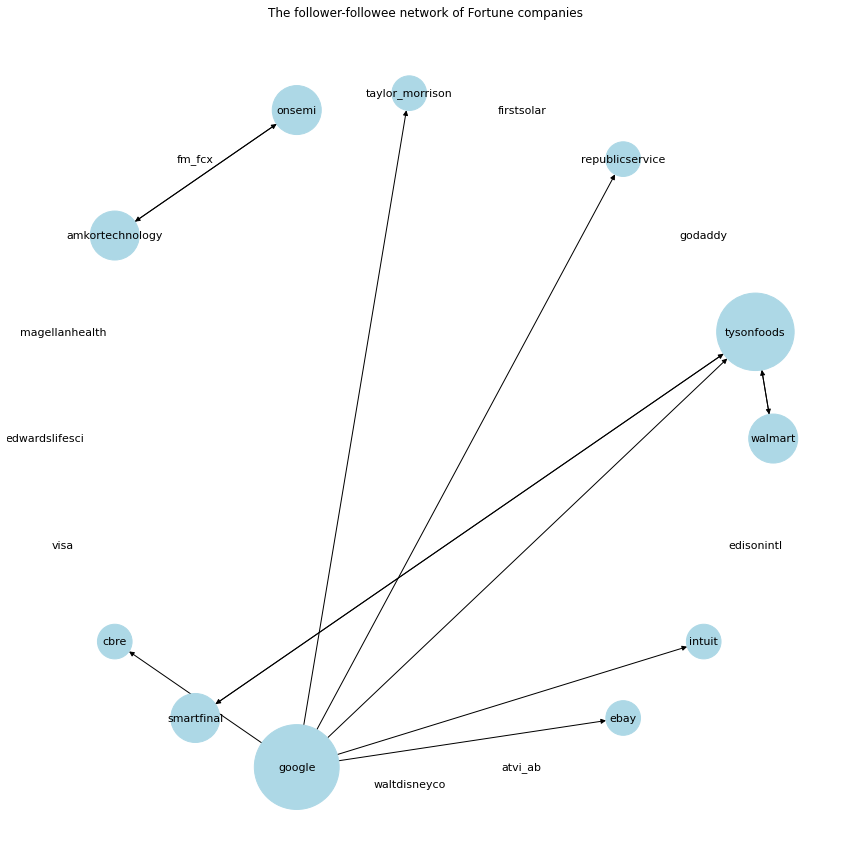

In [23]:
# Build a network from the adjacency matrix
pdAdjacency=tb.astype(int)
pdAdjacency

# Visualize

# Create empty DIRECTED graph
import networkx as nx 
import matplotlib.pyplot as plt 

G = nx.DiGraph()

rows=len(pdAdjacency)
columns=len(pdAdjacency.columns)
adjacent=pdAdjacency.to_numpy()

#Then loop over the matrix and mark each corresponding edge.
for i in range(rows): 
  for j in range(columns): 
    if adjacent[i][j] == 1: 
      G.add_edge(i,j) 

# Add edges 
#G.add_edges_from(list(pdAdjacency.columns))
G = nx.from_pandas_adjacency(pdAdjacency, create_using=nx.MultiDiGraph())

print("\nEdges in the graph",G.edges(data=True))
nx.to_pandas_edgelist(G)


print('\n\n# of edges: {}'.format(G.number_of_edges()))
print('# of nodes: {}'.format(G.number_of_nodes()))

print(list(G.nodes)[0:5], "Graph size: ", G.size())
d = dict(G.degree)

# Setting colour of nodes, size, edge colour, width, style, etc
options = {
    
    # Settings for nodes and edges
    'node_color': 'lightblue',
    'node_size': [v * 1200 for v in d.values()],
    
    'arrows':True,
    'edge_color': 'black',
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 10,

    # print labels or node names too
    'with_labels': True,
    'font_size':11,
}


plt.figure(3, figsize=(15,15))  # larger figure size
plt.title('The follower-followee network of Fortune companies')
#nx.draw_networkx(G, **options)

pos = nx.circular_layout(G)
nx.draw(G, pos , **options)
plt.show()

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

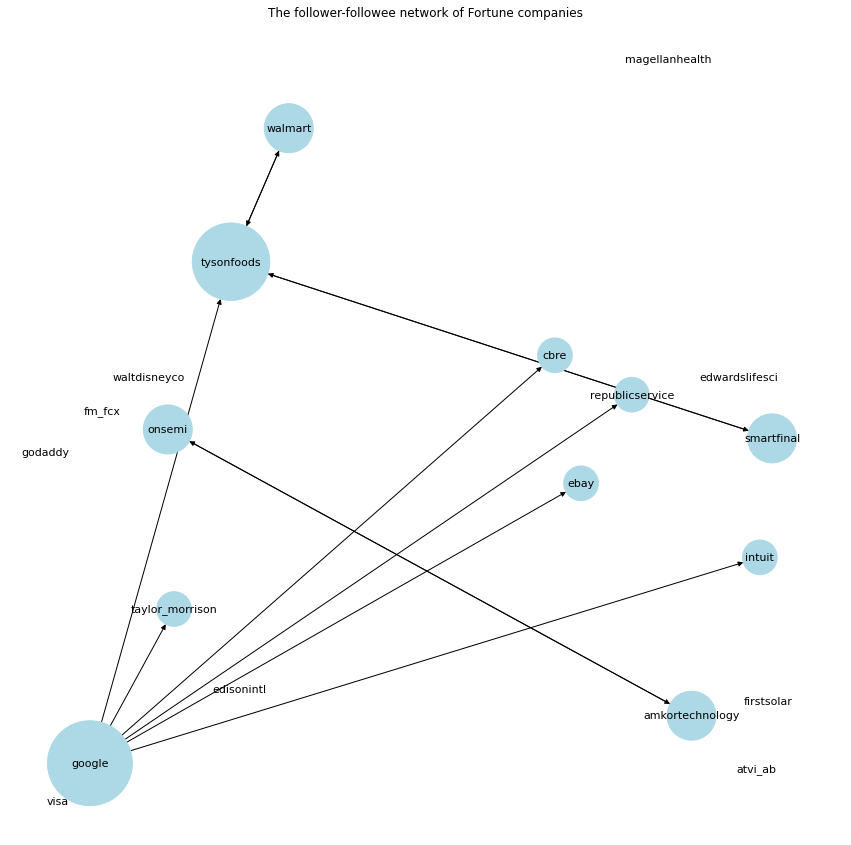

In [25]:

plt.figure(3, figsize=(15,15))  # larger figure size
plt.title('The follower-followee network of Fortune companies')
#nx.draw_networkx(G, **options)
pos = nx.circular_layout(G)
nx.draw_random(G, **options)
plt.show()

In [27]:
# get adjacency matrix
print("Dense Adjacency Matrix: \n", nx.incidence_matrix(G).todense() )

Dense Adjacency Matrix: 
 [[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [28]:
# calculate centrality and constraint

# degree centrality
lstDegreeCentrality=sorted([x for x in nx.degree_centrality(G).items()],key=lambda x: -x[1])
print("Degree centrality: ", lstDegreeCentrality)
# indegree centrality
print("\n\nIndegree centrality:", [x for x in nx.in_degree_centrality(G).items()][0])
# outdegree centrality
print("\n\nOutdegree centrality:", [x for x in nx.out_degree_centrality(G).items()][0])

# OR can be calculated in the following ways:
#deg_centrality = nx.degree_centrality(G)
#print("Degree of centrality", deg_centrality)
#in_deg_centrality = nx.in_degree_centrality(G)
#print("\nIn degree: ", in_deg_centrality)
#out_deg_centrality = nx.out_degree_centrality(G)
#print("\nOut Degree: ", out_deg_centrality)

Degree centrality:  [('google', 0.3157894736842105), ('tysonfoods', 0.2631578947368421), ('walmart', 0.10526315789473684), ('onsemi', 0.10526315789473684), ('amkortechnology', 0.10526315789473684), ('smartfinal', 0.10526315789473684), ('republicservice', 0.05263157894736842), ('taylor_morrison', 0.05263157894736842), ('cbre', 0.05263157894736842), ('ebay', 0.05263157894736842), ('intuit', 0.05263157894736842), ('godaddy', 0.0), ('firstsolar', 0.0), ('fm_fcx', 0.0), ('magellanhealth', 0.0), ('edwardslifesci', 0.0), ('visa', 0.0), ('waltdisneyco', 0.0), ('atvi_ab', 0.0), ('edisonintl', 0.0)]


Indegree centrality: ('walmart', 0.05263157894736842)


Outdegree centrality: ('walmart', 0.05263157894736842)


In [29]:
close_centrality = nx.closeness_centrality(G)
close_centrality

{'amkortechnology': 0.05263157894736842,
 'atvi_ab': 0.0,
 'cbre': 0.05263157894736842,
 'ebay': 0.05263157894736842,
 'edisonintl': 0.0,
 'edwardslifesci': 0.0,
 'firstsolar': 0.0,
 'fm_fcx': 0.0,
 'godaddy': 0.0,
 'google': 0.0,
 'intuit': 0.05263157894736842,
 'magellanhealth': 0.0,
 'onsemi': 0.05263157894736842,
 'republicservice': 0.05263157894736842,
 'smartfinal': 0.09473684210526315,
 'taylor_morrison': 0.05263157894736842,
 'tysonfoods': 0.15789473684210525,
 'visa': 0.0,
 'walmart': 0.09473684210526315,
 'waltdisneyco': 0.0}

<a id='Q3'></a>
### Bonus question: (3 points)
 * Define a functionn to scrape the most recent (the recent week, but you can go beyond a bit if in one call you get a few) **original tweets** (exclude retweets) from multiple accouts. This function will take a list of screen names as input.
 * For each tweet, grab "id","created_at","full_text","user.screen_name".
 * Make a dataframe and return the dataframe.
 * Use the function to get the original tweets of the top twp accounts from Q2. 


In [30]:
import time 

def get_all_tweets_for_a_user(user_name):
    
    alltweets=[]
    new_tweets=api.user_timeline(user_name, count=200,tweet_mode="extended")
    alltweets.extend(new_tweets)
    oldest=alltweets[-1].id-1  
    
    # set date condition
    # We want to scrap recent tweets only week old tweets only
    from datetime import datetime, timedelta

    # dd/mm/YY H:M:S
    #startDate=datetime(2021, 1, 1, 0, 0, 0)
    today = datetime.now()
    startDate=today-timedelta(days=8)  # keeping it 8 to scrap twits on boundary of starting of latest week
    print("Starting date (UTC) is (Latest week): {}".format(startDate))
    
    
    while new_tweets[-1].created_at > startDate:
        time.sleep(1)
        print ("getting tweets before", oldest)
        new_tweets = api.user_timeline(user_name,count=200, max_id=oldest)
        alltweets.extend(new_tweets)
        oldest=alltweets[-1].id-1
        print("...{} tweets downloaded so far".format(len(alltweets)))
        
    # check if it's a retweet
    # When using extended mode with a Retweet, the full_text attribute of the 
    # Status object may be truncated. However, since the retweeted_status attribute 
    # (of a Status object that is a Retweet) is itself a Status object the full_text 
    # attribute of the Retweeted Status object can be used instead.
    
    outtweets_all=[]

    for tweet in alltweets:
        status = api.get_status(tweet.id, tweet_mode="extended")
        
        if hasattr(status, "retweeted_status"):  # is a retweet
            full_text=status.retweeted_status.full_text.encode("utf-8")
            
            outtweets=[
                        # tweet content
                        tweet.id_str, tweet.created_at,full_text,
                        # user features
                        tweet.user.name]
            outtweets_all.append(outtweets)
  
        else: # not a retweet
            full_text=status.full_text.encode("utf-8")
                    
            outtweets=[
                        # tweet content
                        tweet.id_str, tweet.created_at,full_text,
                        # user features
                        tweet.user.name]
            outtweets_all.append(outtweets)

    return outtweets_all


def get_all_tweets(user_names):
  print("User names: ", user_names)
  pdAllTweets=pd.DataFrame()
  lenOfDf=0
  #pass in the username of the account you want to download
  for user in user_names:
    outtweets_all=[]
    
    print("\n\nCollecting information for the User: {}".format(user))
    outtweets_all=get_all_tweets_for_a_user(user)
    print("Number of tweets scraped: {}".format(len(outtweets_all)))

    if lenOfDf>0: pdAllTweets=pd.concat([pdAllTweets, pd.DataFrame(outtweets_all)]).reset_index()
    else: 
      pdAllTweets=pd.DataFrame(outtweets_all)
      lenOfDf=1

  return pdAllTweets




users=[lstDegreeCentrality[0:2][0][0], lstDegreeCentrality[0:2][1][0]]

if __name__ == '__main__': 
    df=get_all_tweets(users) 
    df  


User names:  ['google', 'tysonfoods']


Starting date (UTC) is (Latest week): 2021-10-13 02:49:43.658860
getting tweets before 1450385623437778944
...400 tweets downloaded so far
getting tweets before 1448588906383958019
...600 tweets downloaded so far
Number of tweets scraped: 600


Starting date (UTC) is (Latest week): 2021-10-13 02:59:19.762858
Number of tweets scraped: 200


,index,0,1,2,3
0,0,1450970118582906880,2021-10-20 23:40:08,"b""@nitace9 Hi, Nitesh. Due to the Reserve Bank...",Google
1,1,1450914092491935747,2021-10-20 19:57:30,"b""We're excited to introduce you to Google Ten...",Google
2,2,1450898932956024832,2021-10-20 18:57:16,b'#Matter is the universal standard transformi...,Google
3,3,1450888005300916224,2021-10-20 18:13:51,b'Calling all creators! \xf0\x9f\x93\xa2\xf0\x...,Google
4,4,1450875663314001924,2021-10-20 17:24:48,b'@Tweetnaushaad Hi there. Mind if we jump in?...,Google
...,...,...,...,...,...
795,195,1320012726136115200,2020-10-24 14:42:13,b'Podcast: Karen Christensen details how findi...,Tyson Foods
796,196,1318916159425699840,2020-10-21 14:04:51,"b""@Mrs_Conboy @DonorsChoose @IndianTrailDG58 W...",Tyson Foods
797,197,1318620158013865985,2020-10-20 18:28:39,b'Our own President &amp; CEO Dean Banks and C...,Tyson Foods
798,198,1318559620143718400,2020-10-20 14:28:05,"b""@khurckes @DonorsChoose We're proud to be ab...",Tyson Foods
